In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
t = np.linspace(20,35,100)
t = t + np.random.normal(0.0, 0.1, 100)

def periodic_function(a, interval, dist, t):
    return (a[0] + a[1]*t + a[2]*np.sin(a[4]*t) + a[3]*np.cos(a[4]*t) + np.random.normal(0.0, dist, interval[2]))

In [3]:
data = periodic_function([0,1,1,1,0], [20,35,100], 0.5, t)

Text(0, 0.5, 'Data')

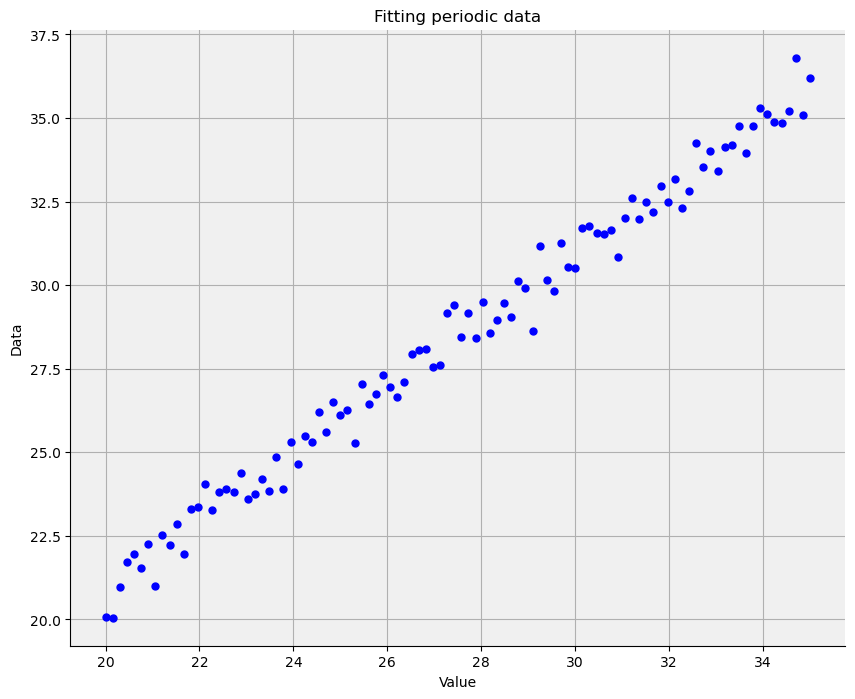

In [4]:
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

plt.plot(np.linspace(20,35,100), data, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color)


plt.title("Fitting periodic data")
plt.xlabel("Value")
plt.ylabel("Data")

In [5]:
def fitfunction(x, a, b, c, d, e):
    return a + b*x + c*np.sin(e*x) + d*np.cos(e*x) 

In [6]:
from scipy.optimize import curve_fit

init_vals = [1,1,1,1,1]

popt, pcov = curve_fit(fitfunction, t, data, p0=init_vals)

print (popt)
print (pcov)

for i in range(len(popt)):
    print(f"{popt[i]} +/- {np.sqrt(pcov[i][i])}")

[ 1.22977784  0.98965401  0.08762424 -0.06044319  1.51961073]
[[ 1.15360869e-01 -4.08792523e-03 -2.36634942e-02 -3.87241278e-02
   1.48734876e-02]
 [-4.08792523e-03  1.48287667e-04  8.18118308e-04  1.35309902e-03
  -5.21744648e-04]
 [-2.36634942e-02  8.18118308e-04  8.60477043e-02  1.18430166e-01
  -4.87219459e-02]
 [-3.87241278e-02  1.35309902e-03  1.18430166e-01  1.78159495e-01
  -7.12991923e-02]
 [ 1.48734876e-02 -5.21744648e-04 -4.87219459e-02 -7.12991923e-02
   2.94171134e-02]]
1.229777843614382 +/- 0.33964815541379145
0.9896540146405696 +/- 0.012177342367962269
0.08762423739869053 +/- 0.2933388898387261
-0.060443188030404 +/- 0.4220894390792768
1.5196107292409133 +/- 0.1715141783035494


These values do not agree, within error, with the expected value

In [7]:
yfit = []
chi2=0
for i in range (0,100):
    yfit.append(fitfunction(t[i],*popt))
    chi2 += (data[i]-yfit[i])*(data[i]-yfit[i])

print ("Chi^2 / dof = %.3E / %d" % (chi2,100-len(init_vals)))

Chi^2 / dof = 2.501E+01 / 95


Text(0, 0.5, 'Data')

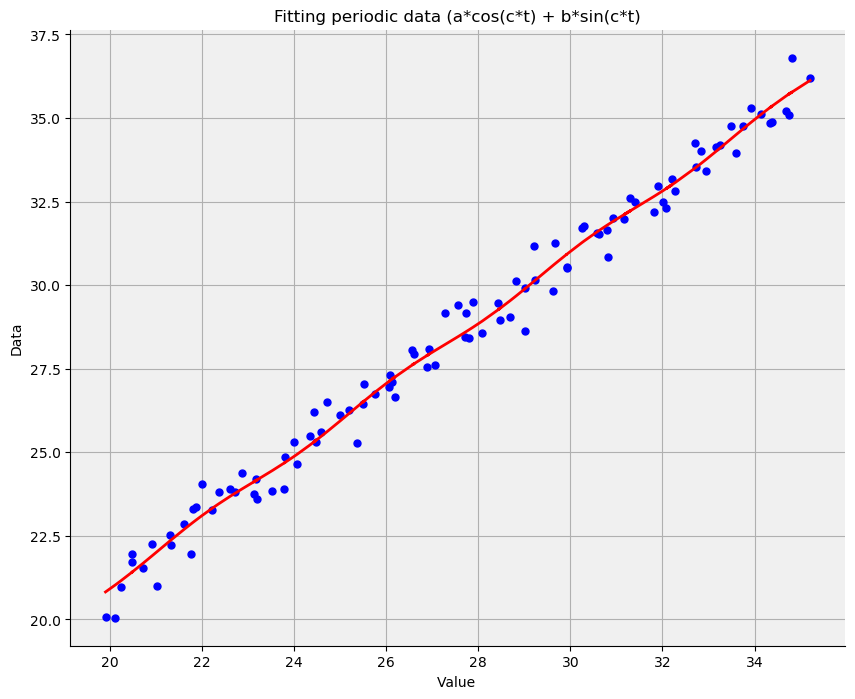

In [8]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(t, data, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color, label='Data')

plt.plot(t,yfit,color='r', linewidth=2)#, label = 'fit: Amplitude = %.3E, \nLinear = %.3E' % tuple(popt))


# Set the plot title and axis labels
plt.title("Fitting periodic data (a*cos(c*t) + b*sin(c*t)")
plt.xlabel("Value ")
plt.ylabel("Data")


In [9]:
def fitfunction2(t, a, b, c, d, e):
    return a + b*t + c*np.sin(e*t + d)

In [10]:
from scipy.optimize import curve_fit

init_vals = [1,1,1,1,1]

popt2, pcov2 = curve_fit(fitfunction2, t, data, p0=init_vals)

print (popt2)
print (pcov2)

for i in range(len(popt2)):
    print(f"{popt2[i]} +/- {np.sqrt(pcov2[i][i])}")

[  1.22977845   0.9896541   -0.10644748 -10.02831417   1.51958147]
[[ 1.15372333e-01 -4.08834851e-03 -2.50973660e-03 -4.26094500e-01
   1.48895769e-02]
 [-4.08834851e-03  1.48303293e-04  9.48772070e-05  1.48433613e-02
  -5.22360157e-04]
 [-2.50973660e-03  9.48772070e-05  5.03701667e-03  9.40975027e-03
  -3.82860138e-04]
 [-4.26094500e-01  1.48433613e-02  9.40975027e-03  2.28773732e+01
  -8.11441804e-01]
 [ 1.48895769e-02 -5.22360157e-04 -3.82860138e-04 -8.11441804e-01
   2.94247564e-02]]
1.2297784525767086 +/- 0.339665030632028
0.9896540970079309 +/- 0.012177983959572812
-0.10644747829506467 +/- 0.07097194282239994
-10.028314171960409 +/- 4.783029713728883
1.5195814661924392 +/- 0.1715364578576051


In [11]:
yfit2 = []
chi22=0
for i in range (0,100):
    yfit2.append(fitfunction2(t[i],*popt2))
    chi22 += (data[i]-yfit2[i])*(data[i]-yfit2[i])

print ("Chi^2 / dof = %.3E / %d" % (chi22,100-len(init_vals)))

Chi^2 / dof = 2.501E+01 / 95


Text(0, 0.5, 'Data')

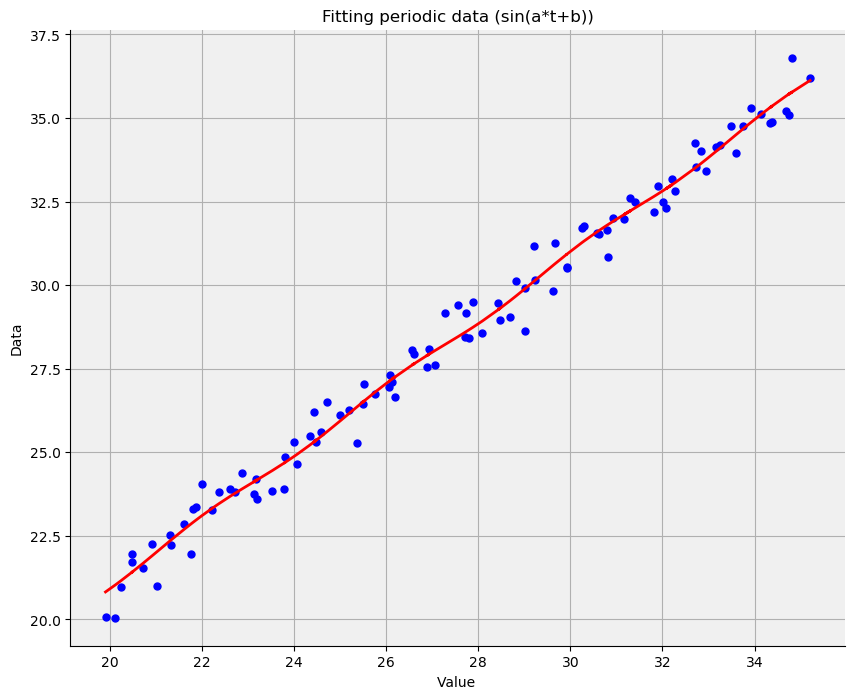

In [12]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(t, data, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color, label='Data')

plt.plot(t,yfit2,color='r', linewidth=2)#, label = 'fit: Amplitude = %.3E, \nLinear = %.3E' % tuple(popt))


# Set the plot title and axis labels
plt.title("Fitting periodic data (sin(a*t+b))")
plt.xlabel("Value ")
plt.ylabel("Data")


The two fitting methods give identical chi^2 values, so they fit equally well.